Weathr API report:
1.Near Equator temperature is higher and its goes down right side of equator.
2.Right side of equator is more humid than left side.
3.Cloudyness is pretty much scattered.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# generate random 500 latitude and longitude values
lat = np.random.uniform(low=-90, high=90, size=(1400,))
lon = np.random.uniform(low=-180, high=180, size=(1400,))

weather_df = pd.DataFrame({"Lat": lat,"Lon":lon})
weather_df["City"]=""
weather_df["Country Code"]=""
weather_df["Max Temp"]=""
weather_df["Humidity"]=""
weather_df["Cloudiness"]=""
weather_df["Wind Speed"]=""
weather_df.head()

,Lat,Lon,City,Country Code,Max Temp,Humidity,Cloudiness,Wind Speed
0,82.344153,-170.216084,,,,,,
1,60.525112,-143.781521,,,,,,
2,71.092499,91.801115,,,,,,
3,-62.652711,168.293416,,,,,,
4,43.310413,36.273274,,,,,,


In [3]:
# Genearte cities list
for index,row in weather_df.iterrows():
    
    city = citipy.nearest_city(row['Lat'],row['Lon'])
    city_name = city.city_name
    city_country_code = city.country_code
    
    weather_df.set_value(index,"City",city_name)
    weather_df.set_value(index,"Country Code",city_country_code)
    
# creating a list of unique number of cities
# dropping the duplicates and keeping the first city name
weather_unique_df = weather_df.drop_duplicates(['City'], keep='first')

# number of unique cities in the list
len(weather_unique_df)

C:\Users\User\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\User\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


608

In [4]:
# Perform API Calls

print('Beginning Data Retrieval')
print('-----------------------------')

for index,row in weather_unique_df.iterrows():
   
    print(f'Processing Record {index} | {row["City"]}')
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&APPID=%s" %(row["City"].replace(" ","+"), api_key)

    resp = requests.get(target_url).json()
 
    try:
        weather_unique_df.set_value(index,"Max Temp",resp["main"]["temp"])
        weather_unique_df.set_value(index,"Humidity",resp['main']['humidity'])
        weather_unique_df.set_value(index,"Cloudiness",resp['clouds']['all'])
        weather_unique_df.set_value(index,"Wind Speed",resp['wind']['speed'])
        
    except KeyError:
        print("oops !! missing values")
        
print("--------------------------")    
print("Data Retrieval Complete!")
print("--------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 0 | mys shmidta
oops !! missing values
Processing Record 1 | palmer


C:\Users\User\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\User\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\User\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\User\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Processing Record 2 | talnakh
Processing Record 3 | bluff
Processing Record 4 | sinop
Processing Record 5 | pevek
Processing Record 6 | albany
Processing Record 7 | ushuaia
Processing Record 8 | yanan
oops !! missing values
Processing Record 9 | vardo
Processing Record 10 | upernavik
Processing Record 11 | georgetown
Processing Record 12 | half moon bay
Processing Record 14 | mataura
Processing Record 15 | astoria
Processing Record 16 | chuy
Processing Record 17 | yellowknife
Processing Record 18 | namatanai
Processing Record 19 | paramonga
Processing Record 21 | gorzow wielkopolski
Processing Record 23 | hami
Processing Record 24 | matlock
Processing Record 25 | bay roberts
Processing Record 26 | attawapiskat
oops !! missing values
Processing Record 27 | iwanai
Processing Record 28 | nizhneyansk
oops !! missing values
Processing Record 29 | sao filipe
Processing Record 30 | puerto escondido
Processing Record 32 | tura
Processing Record 34 | hithadhoo
Processing Record 36 | esperance
P

Processing Record 396 | lasa
Processing Record 400 | porto belo
Processing Record 402 | minanga
Processing Record 404 | payakumbuh
Processing Record 406 | ambilobe
Processing Record 410 | canaries
oops !! missing values
Processing Record 412 | karasjok
Processing Record 413 | osmena
Processing Record 414 | cherskiy
Processing Record 415 | barentsburg
oops !! missing values
Processing Record 416 | harvard
Processing Record 418 | sangar
Processing Record 419 | svetlyy
oops !! missing values
Processing Record 420 | skibbereen
Processing Record 423 | westport
Processing Record 424 | itarema
Processing Record 425 | rembang
Processing Record 426 | cap malheureux
Processing Record 428 | cabedelo
Processing Record 429 | vaitupu
oops !! missing values
Processing Record 430 | orgun
oops !! missing values
Processing Record 432 | yar-sale
Processing Record 435 | ostrovnoy
Processing Record 436 | green valley
Processing Record 438 | rungata
oops !! missing values
Processing Record 439 | cabra
Proce

oops !! missing values
Processing Record 969 | college
Processing Record 974 | ponta delgada
Processing Record 977 | tual
Processing Record 978 | antalaha
Processing Record 980 | moose factory
Processing Record 981 | kuche
oops !! missing values
Processing Record 983 | elizabeth city
Processing Record 985 | ouargaye
Processing Record 991 | kapit
Processing Record 992 | padang
Processing Record 993 | jinchang
Processing Record 994 | castanos
Processing Record 997 | san rafael
Processing Record 1004 | pyapon
Processing Record 1005 | santiago de cao
Processing Record 1010 | barbar
oops !! missing values
Processing Record 1011 | coihaique
Processing Record 1015 | chicago
Processing Record 1019 | dicabisagan
Processing Record 1025 | uhlove
Processing Record 1031 | touros
Processing Record 1034 | dingle
Processing Record 1042 | chitral
Processing Record 1048 | karamea
oops !! missing values
Processing Record 1053 | norman wells
Processing Record 1057 | slantsy
Processing Record 1066 | tagusa

In [9]:
#replacing the empty spaces with NaN values
weather_clean_df = weather_unique_df.replace(r'\s+', np.nan).replace('',np.nan)

In [6]:
# Dropping the rows with NaN values
weather_clean_df = weather_clean_df.dropna(how='any')
weather_clean_df = weather_clean_df.round({"Lat":2,"Lon":2})
weather_clean_df.reset_index()
#  display the dataframe with retrieved Data

weather_clean_df.to_csv('weatherAPI.csv',index=False)
weather_clean_df.head()

,Lat,Lon,City,Country Code,Max Temp,Humidity,Cloudiness,Wind Speed
1,60.53,-143.78,palmer,us,57.24,72.0,75.0,18.34
2,71.09,91.80,talnakh,ru,31.85,96.0,88.0,17.05
3,-62.65,168.29,bluff,nz,74.15,92.0,0.0,2.39
4,43.31,36.27,sinop,tr,48.06,49.0,75.0,13.87
5,81.98,167.76,pevek,ru,-0.82,78.0,56.0,1.72


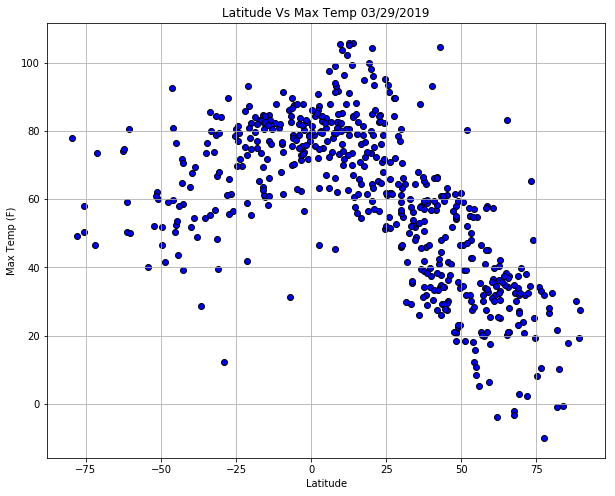

In [20]:
#scatter plots
#Latitude vs Temperature PLot

Lat = weather_clean_df["Lat"].tolist()
temp = weather_clean_df["Max Temp"].tolist()

# enlarging the size of the plot and setting grid lines
fig = plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=temp,marker="o",facecolors="blue",edgecolors='black')

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Latitude Vs Max Temp 03/29/2019")
fig.savefig('Max_Temp.png', dpi=fig.dpi)

plt.show()


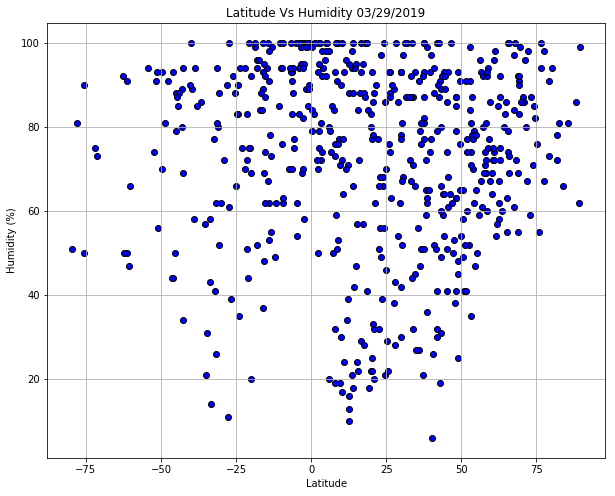

In [21]:
#Latitude Vs Humidity PLot

Lat = weather_clean_df["Lat"].tolist()
hum = weather_clean_df["Humidity"].tolist()

# enlarging the size of the plot and setting grid lines
fig = plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=hum,marker="o",facecolors="blue",edgecolors='black')

plt.title(f"Latitude Vs Humidity 03/29/2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
fig.savefig('humidity.png', dpi=fig.dpi)

plt.show()

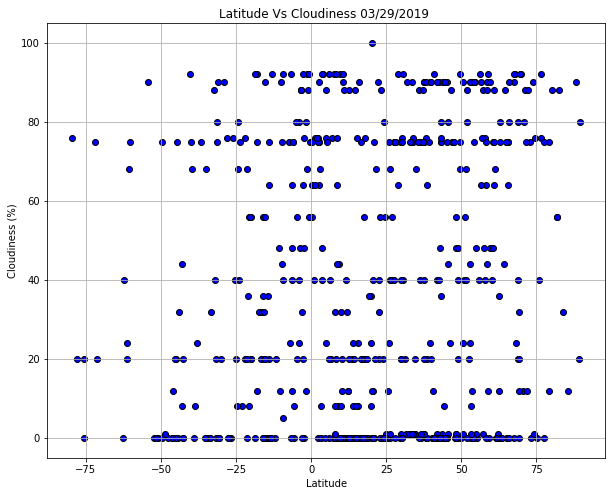

In [22]:
#Latitude Vs Cloudiness Plot

Lat = weather_clean_df["Lat"].tolist()
cloud = weather_clean_df["Cloudiness"].tolist()

# enlarging the size of the plot and setting grid lines
fig = plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=cloud,marker="o",facecolors="blue",edgecolors='black')

plt.title(f"Latitude Vs Cloudiness 03/29/2019 ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
fig.savefig('cloudy.png', dpi=fig.dpi)

plt.show()


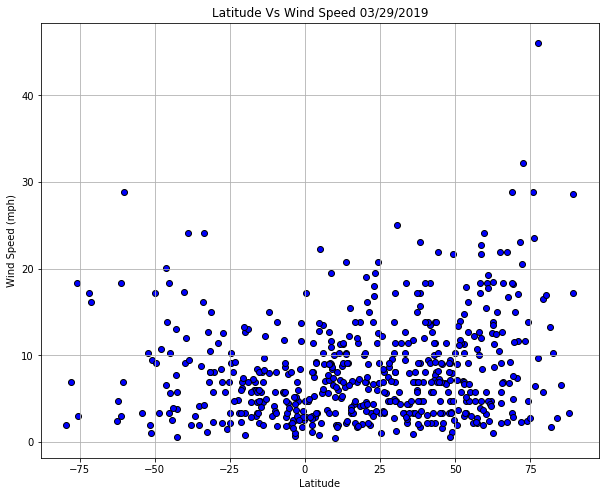

In [23]:
#Latitude vs Wind Speed plot

Lat = weather_clean_df["Lat"].tolist()
wind = weather_clean_df["Wind Speed"].tolist()

# enlarging the size of the plot and setting grid lines
fig = plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=wind,marker="o",facecolors="blue",edgecolors='black')

plt.title(f"Latitude Vs Wind Speed 03/29/2019")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
fig.savefig('wind_speed.png', dpi=fig.dpi)

plt.show()
